# Lecture 8: Unsupervised Learning

# 8.1. Introduction to Unsupervised Learning

As mentioned before, the three main types of machine learning methods are supervised learning, unsupervised learning, and Reinforcement learning. We were focusing on supervised learning for the last few lectures, but now we will shift our attention to another primary learning paradigm, unsupervised learning.

Let's start by understanding what is unsupervised learning at a high level, starting with a dataset and an algorithm.

Unlike supervised Learning, in unsupervised Learning, we have a dataset *without* labels. Even though our data points are not labeled, we can still learn interesting things about the structure of the data including:

* Clusters hidden in the dataset.

* Outliers: particularly unusual and/or interesting datapoints.

* Useful signal hidden in noise, e.g. human speech over a noisy phone.

In unsupervised learning, we also define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Unsupervised Model} $$

The unsupervised model describes interesting structures in the data. For instance, it can identify interesting hidden clusters.

## 8.1.1. Unsupervised Learning - Example

To concretize the ideas of unsupervised learning, let's look at an example of an unsupervised learning model.

### 8.1.1.1. Unsupervised Learning - Example Dataset

As an example of an unsupervised learning dataset, we will use our Iris flower dataset example, but we will discard the labels.

We start by loading this dataset.

In [1]:
# import standard machine learning libraries
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Print out the description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

For simplicity, we will discard petal length and width and use only sepal length and width as the features of each datapoint. Importantly, we also discard the class attribute, which is the label of this dataset, since we will run an unsupervised learning algorithm on this dataset.

With each datapoint containing two attributes, we can easily visualize this dataset in 2D using the code below:

Fontconfig warning: ignoring UTF-8: not a valid region tag


Text(0.5, 1.0, 'Dataset of Iris flowers')

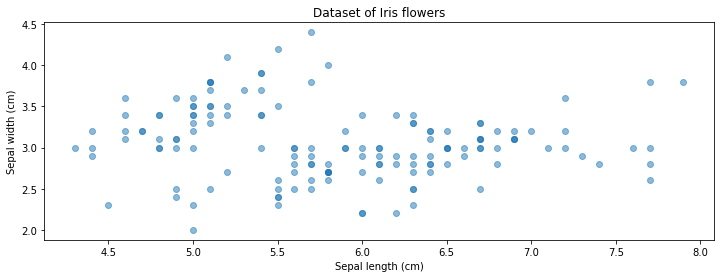

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Visualize the Iris flower dataset
# iris.data[:,0] is the sepal length, while iris.data[:,1] is the sepal width 
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

### 8.1.1.2. Unsupervised Learning - Example Algorithm

We can use this dataset, with only sepal length and width as features and without labels, as input to a popular unsupervised learning algorithm, $K$-means.

* The algorithm seeks to find $K$ hidden clusters in the data.

* Each cluster is characterized by its centroid (its mean).

* The clusters reveal interesting structures in the data.

The code below runs $K$-means, which is available in Scikit-Learn libary, on the data using $K = 3$.

In [3]:
# fit K-Means with K=3
from sklearn import cluster
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data[:,[0,1]])

KMeans(n_clusters=3)

We can now visualize the 3 clusters we have learned from $K$-means:

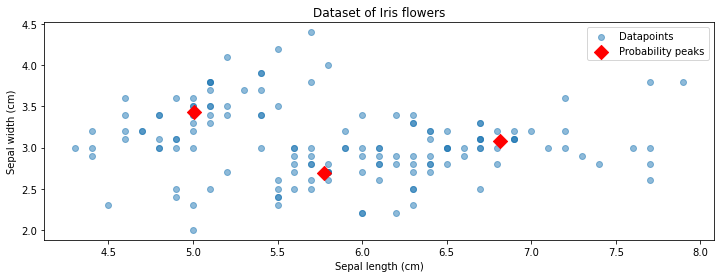

In [4]:
# visualize the datapoints
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
# visualize the learned clusters with red markers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

Looking at the visualization produced below, where we give different colors to datapoints belonging to different classes, we find that these learned clusters correspond nicely to the three types (classes) of flowers found in the dataset, which are the labels that the learning model did not have access to. 

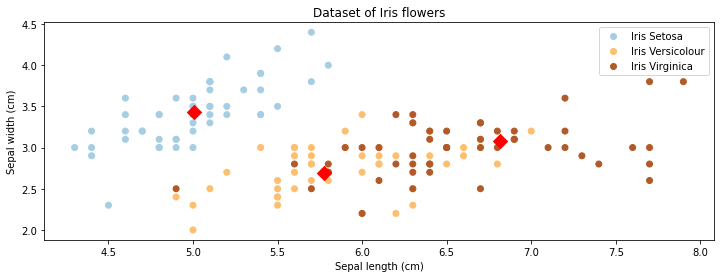

In [5]:
# visualize datapoints belonging to different classes with colors
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
# visualize the learned cluster with red markers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

Hopefully, this example helps convince you that there is usually interesting structural information you can learn using unsupervised learning algorithms from totally unlabeled data.

## 8.1.2. Applications of Unsupervised Learning

Now, you might ask in what applications do we not have labels and want to use unsupervised learning?

Here are some applications we use it for:

* Visualization: identifying and making accessible useful hidden structures in the data.

* Anomaly detection: identifying factory components that are likely to break soon.

* Signal denoising: extracting human speech from a noisy recording.

Concrete applications include:

* Discovering Structure in Digits: Unsupervised learning can discover structure in digits without any labels. This task has a similar flavor to the Iris dataset we were looking at earlier.

* DNA Analysis: Unsupervised learning can be used to perform Dimensionality Reduction, which can be applied to DNA to reveal the geography of each country.

* Facial Feature Learning: Modern unsupervised algorithms based on deep learning can uncover structure in human face datasets.

# 8.2. The Language of Unsupervised Learning

Next, let's look at how to define an unsupervised learning problem more formally.

## 8.2.1. Unsupervised Learning - Setting

Once again, at a high level, an unsupervised machine learning problem has the following structure:

$$ \underbrace{\text{Dataset}}_\text{Attributes, Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Unsupervised Model} $$

We define a dataset of size $n$ for unsupervised learning as
$$\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$$

Each $x^{(i)} \in \mathbb{R}^d$ denotes an input, a vector of $d$ attributes or features.

We can think of an unsupervised learning algorithm as consisting of three components:

* A __model class__: the set of possible unsupervised models we consider.

* An __objective__ function, which defines how good a model is.

* An __optimizer__, which finds the best predictive model in the model class according to the objective function

### 8.2.1.1. Model: Notation

We'll say that a model is a function
$$ f_\theta : \mathcal{X} \to \mathcal{S} $$
that maps inputs $x \in \mathcal{X}$ to some notion of structure $s \in \mathcal{S}$. Models may have *parameters* $\theta \in \Theta$ living in a set $\Theta$

Structures can take many forms (clusters, low-dimensional representations, etc.), and we will see many examples.

### 8.2.1.2. Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} = \{f_\theta \mid f_\theta : \mathcal{X} \to \mathcal{S}; \; \theta \in \Theta \}.$$
of possible models (models with different parameters) that map input features to structural elements.

### 8.2.1.3. Objective: Notation

We again define an *objective function* (also called a *loss function*)
$$J(\theta) : \Theta \to [0, \infty), $$
which describes the extent to which $f_\theta$ "fits" the data $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$.

### 8.2.1.4. Optimizer: Notation

An optimizer finds a model $f_\theta \in \mathcal{M}$ with the smallest value of the objective $J$.
\begin{align*}
\min_{\theta \in \Theta} J(\theta)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

## 8.2.2. An Example: $K$-Means

As an example, let's mathematically define the $K$-Means algorithm that we saw earlier.

Recall that:

* The algorithm seeks to find $K$ hidden clusters in the data.

* Each cluster is characterized by its centroid (its mean).

### 8.2.2.1. The $K$-Means Model

The parameters $\theta$ of the model are $K$ *centroids* $c_1, c_2, \ldots c_K \in \mathcal{X}$. The class of $x$ is $k$ if $c_k$ is the closest centroid to $x$ (for this lecture, let's assume the distance metric in use is Euclidean distance, although the algorithm works with any distance metric of your choice).

We can think of the model returned by $K$-Means as a function
$$f_\theta : \mathcal{X} \to \mathcal{S}$$
that assigns each input $x$ to a cluster $s \in \mathcal{S} = \{1,2,\ldots,K\}$.

### 8.2.2.2. K-Means at a High Level

At a high level, $K$-means performs the following steps. 

Starting from random centroids, we repeat until convergence:

1. Update each cluster: assign each point to its closest centroid.

2. Set each centroid to be the center of the its cluster

This is best illustrated visually - see [Wikipedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)

### 8.2.2.3. The $K$-Means Objective

How do we determine whether $f_\theta$ is a good clustering of the dataset $\mathcal{D}$?

We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized:
$$J(\theta) = \sum_{i=1}^n || x^{(i)} - \text{centroid}(f_\theta(x^{(i)})) ||,$$
where $\text{centroid}(k) = c_k$ denotes the centroid for cluster $k$.

### 8.2.2.4. The $K$-Means Optimizer

We can optimize this in a two-step process, starting with an initial random cluster assignment $f_\theta(x)$.

Starting with random centroids $c_k$, repeat until convergence:

1. Update $f(x)$ such that $f(x^{(i)}) = \arg\min_k ||x^{(i)} - c_k||$ is the cluster of the closest centroid to $x^{(i)}$.

2. Set each $c_k$ to be the center of its cluster $\{x^{(i)} \mid f(x^{(i)}) = k\}$.

Though we do not prove it here, this process is guaranteed to converge after a finite number of iterations.

### 8.2.2.5. Algorithm: K-Means

We summarize the $K$-means algorithm below:

* __Type__: Unsupervised learning (clustering)

* __Model family__: $k$ centroids

* __Objective function__: Sum of distances (of your choice) to the closest centroids

* __Optimizer__: Iterative optimization procedure.

# 8.3. Unsupervised Learning in Practice

We will now look at some practical considerations to keep in mind when applying unsupervised learning.

## 8.3.1. Review: Generalization

In machine learning, __generalization__ is the property of predictive models to achieve good performance on new, holdout data that is distinct from the training set.

How does generalization apply to unsupervised learning?

## 8.3.2. An Unsupervised Learning Dataset

Consider the following dataset, consisting of datapoints generated by a mixture of four Gaussian distributions. A sample from this mixture distribution should form roughly four clusters.

We visualize a sample of 100 datapoints below:

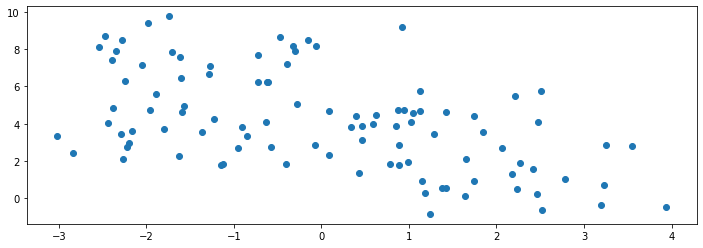

In [6]:
# import libraries
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Setting the seed makes the random module of numpy deterministic across different runs of the program
np.random.seed(0)
# Generate random 2D datapoints using 4 different Gaussians.
X, y = datasets.make_blobs(centers=4)
plt.scatter(X[:,0], X[:,1])

We know the true labels of these clusters, i.e., which Gaussian a datapoint is generated by, so we can visualize them with different colors below:

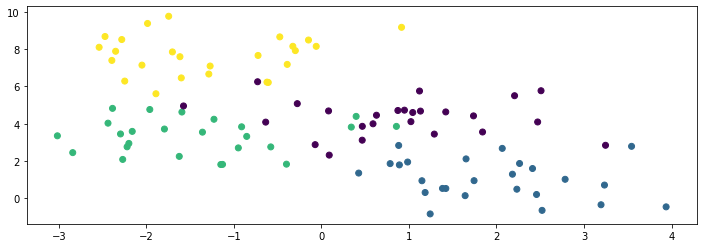

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

## 8.3.3. Underfitting in Unsupervised Learning

Underfitting happens when we are not able to fully learn the signal hidden in the data. In the context of $K$-Means, this means our $K$ is lower than the actual number of clusters in the data.

Let's run $K$-Means on our toy dataset made in the previous section 8.3.2.

In [8]:
# fit a K-Means
from sklearn import cluster
model = cluster.KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

The centroids find two distinct components (rough clusters) in the data, but they fail to capture the true structure.

You can see below, where we visualize both the datapoints and the learned clusters, that more than one color might belong to a cluster:

K-Means Objective: 462.03


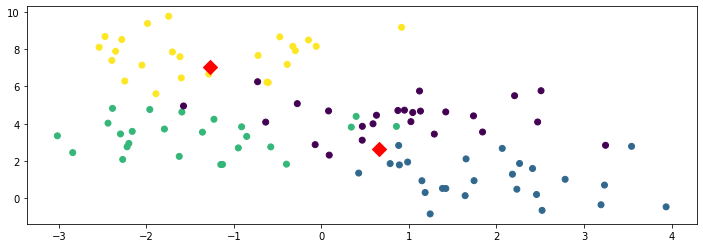

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

Consider now what happens if we further increase the number of clusters.

In the figures below, we have $K$ equal to 4, 10, and 20 from left to right respectively. 

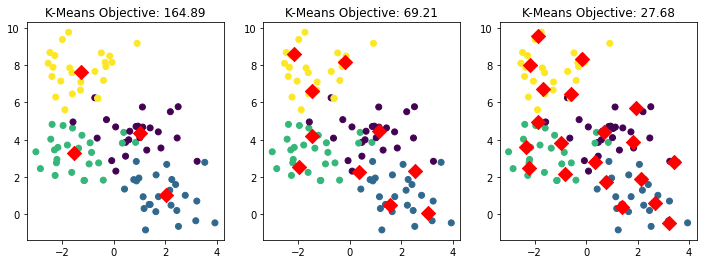

In [10]:
# Will visualize learned clusters of K-means with different Ks.
Ks = [4, 10, 20]
f, axes = plt.subplots(1,3)
for k, ax in zip(Ks, axes):
    # Fit K-means
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    # Visual both the datapoints and the k learned clusters 
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title('K-Means Objective: %.2f' % -model.score(X))

## 8.3.4. Overfitting in Unsupervised Learning

Overfitting happens when we fit the noise, but not the signal. In our example, this means fitting small, local noise clusters rather than the true global clusters. 

We demonstrate it below by setting $K = 50$:

K-Means Objective: 4.67


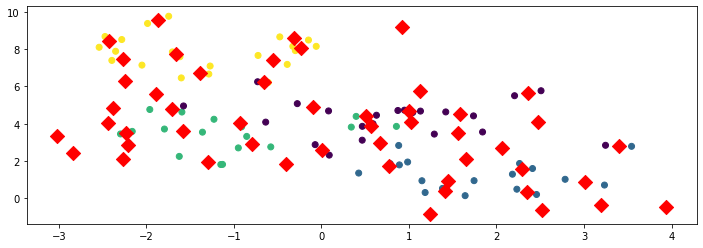

In [11]:
# Setting K = 50
model = cluster.KMeans(n_clusters=50)
# Fit K-means
model.fit(X)
# Visualize both the datapoints and the learned clusters
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

We can see the true structure, i.e., 4 clusters, given enough data. Below we generate 10000 samples to see that

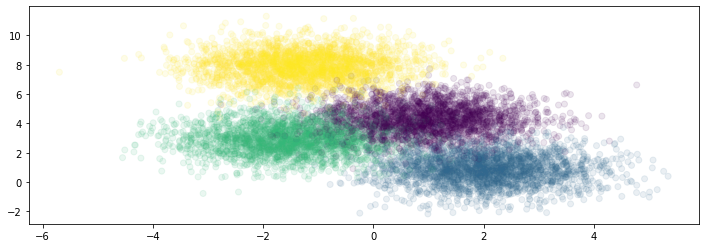

In [17]:
np.random.seed(0)
X, y = datasets.make_blobs(n_samples=10000, centers=4)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.1)

## 8.3.5. Generalization in Unsupervised Learning

To talk about generalization, we usually assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x \sim \mathbb{P}.$$

Moreover, we assume the dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

What *independent and identically distributed* (IID) means is: 

* Each training example is from the same distribution.

* This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has the same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

We can think of the data distribution as being the sum of two distinct components $\mathbb{P} = F + E$

1. A signal component $F$ (hidden clusters, speech, low-dimensional data space, etc.)

2. A random noise component $E$

A machine learning model generalizes if it fits the true signal $F$; it overfits if it learns the noise $E$.

Below, we visualize examples of underfitting, good fit, and overfitting:

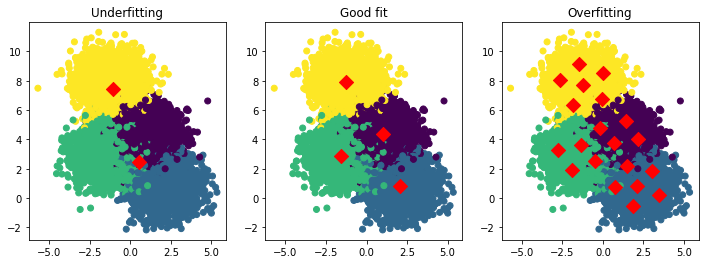

In [13]:
Ks, titles = [2, 4, 20], ['Underfitting', 'Good fit', 'Overfitting']
f, axes = plt.subplots(1,3)
for k, title, ax in zip(Ks, titles, axes):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title(title)

The red diamond dots represent the learned clusters, and the circle dots represent datapoints in each class. 

Underfitting is the case where you have more actual clusters than learned clusters, while overfitting is the case where you have less actual clusters than learned clusters.

#### 8.3.5.1. Detecting Overfitting and Underfitting

Though the figures above tell us if the model is overfitting or underfitting, in real-life scenarios when our data is not two-dimensional, visualizing the data and the cluster centers might not help us detect overfitting or underfitting.

Generally, in unsupervised learning, overfitting and underfitting are more difficult to quantify than in supervised learning because:

* Performance may depend on our intuition and require human evaluation

* If we know the true labels, we can measure the accuracy of the clustering. But we do not have labels for unsupervised learning.

If our model is probabilistic, one thing we can do to detect overfitting without labels is to compare the log-likelihood between the training set and a holdout set (next lecture!).

### 8.3.5.2. The Elbow Method

Now, in terms of a practical method one can use to tune hyper-parameters in unsupervised learning, e.g., choosing $K$ for $K$-means, there is the elbow method.

The elbow method is as follows:

* We plot the objective function as a function of the hyper-parameter $K$.

* The "elbow" of the curve happens when its rate of decrease substantially slows down.

* The "elbow' is a good guess for the hyperparameter.

In our example, the decrease in objective values slows down after $K=4$, and after that, the curve becomes just a line.

Below we plot the graph of objective function value (which is the objective from 8.2.4.3.) vs $K$. You can see that at $K = 4$, our objective value does not improve too much anymore even if we increase $K$.

Text(0, 0.5, 'Objective Function Value')

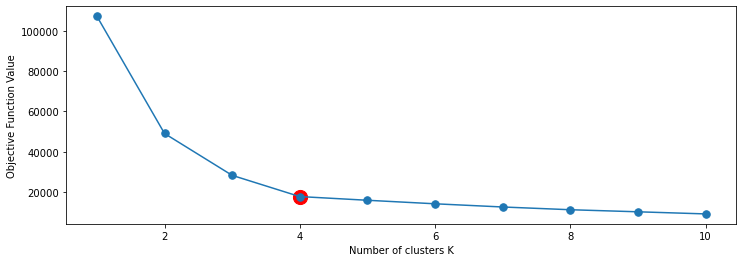

In [14]:
Ks, objs = range(1,11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    objs.append(-model.score(X))

plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([4], [objs[3]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")

### 8.3.5.3. Reducing Overfitting

Choosing hyper-parameters according to the elbow method is one thing you can do to avoid overfitting. 

In general, there are multiple ways to control overfitting including:

1. Reduce model complexity (e.g., reduce $K$ in $K$-Means)

2. Penalize complexity in objective (e.g., penalize large $K$)

3. Use a probabilistic model and regularize it.

### 8.3.5.4. Generalization in Unsupervised Learning: Summary

As you can see, the concept of generalization applies to both supervised and unsupervised learning.

* In supervised learning, it is easier to quantify via accuracy.

* In unsupervised learning, we may not be able to easily detect overfitting, but it still happens. So we have discussed practical methods to reduce overfitting.